In [2]:
import math
import pandas as pd
import seaborn as sns

In [3]:
# Настройка, которая позволяет сделать графики, которые рисует seaborn, более крупными
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [4]:
def round_to_2(x):
    """
    Принимает число и возвращает результат его округления
    до 2 знаков после запятой.

    Аргументы:
        x: Число.

    Возвращаемое значение:
        Результат округления числа до 2 знаков после запятой.
    """

    return round(x, 2)

## Среднее значение в колонке csv-файла

In [5]:
def split_line(line, sep):
    """
    Возвращает список значений, которые содержатся в строке
    и разделены конкретным разделителем.
    Если какое-то из значений обособлено кавычками ("<значение>"), то разделительный
    символ внутри него не считается разделителем.

    Например, если передать в функцию строку 'aa,bb,"cc, oo",dd' и разделитель ',',
    то в результате работы функции получится список ['aa', 'bb', 'cc, oo', 'dd'].

    Аргументы:
        line: Строка, которую нужно разбить на подстроки.
        sep: Разделитель, который используется в строке для отделения различных значений.

    Возвращаемое значение:
        Список подстрок строки, получаемых с помощью разделения её
        на подстроки по заданному разделителю.
    """

    res = []

    prev_ind = -1
    in_quotes = False

    for i in range(len(line)):
        ch = line[i]

        if ch == '"':
            in_quotes = not in_quotes

        if not in_quotes and ch == sep:
            res.append(line[prev_ind + 1:i].strip('"'))
            prev_ind = i

    if prev_ind < len(line) - 1:
        res.append(line[prev_ind + 1:len(line)].strip('"'))
    elif prev_ind == len(line) - 1:
        res.append('')

    return res

In [6]:
def read_csv_and_calc_mean_solution(lines, sep, column_name):
    """
    Принимает список строк из csv-файла и возвращает среднее значение в заданной колонке.
    В первой строке csv-файла всегда представлены названия его колонок.

    Аргументы:
        lines: Список строк, прочитанных из csv-файла.
        sep: Разделитель, который используется в строках для отделения различных значений.
        column_name: Название колонки с целочисленными значениями, по которой нужно посчитать среднее.

    Возвращаемое значение:
        Среднее значение в заданной колонке, округлённое до 2 знаков
        после запятой с помощью функции round_to_2.
    """

    pass

In [22]:
def read_csv_and_calc_mean_solution(lines, sep, column_name):
    vals_sum = 0
    # print(split_line(lines[0], sep))
    col_num = split_line(lines[0], sep).index(column_name)
    for line in lines[1:]:
      vals_sum += int(split_line(line, sep)[col_num])
    return round_to_2(vals_sum / (len(lines) - 1))

print(read_csv_and_calc_mean_solution(
    [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
    ],
    ',',
    "Продолжительность, часы"
))

1.0


In [7]:
def read_csv_and_calc_mean_tests():
    example_1_lines = [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
    ]
    example_1_sep = ','
    example_1_column = 'Год производства'
    example_1_res = 2000.33

    assert read_csv_and_calc_mean_solution(example_1_lines, example_1_sep, example_1_column) == example_1_res

    example_2_lines = [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
        'Комедия,1,48,США-Россия,2012',
        'Драма,2,3,Франция,2016',
        'Документальный,2,47,Германия,2001'
    ]
    example_2_sep = ','
    example_2_column = 'Продолжительность, минуты'
    example_2_res = 29.67

    assert read_csv_and_calc_mean_solution(example_2_lines, example_2_sep, example_2_column) == example_2_res

    print('Все тесты прошли успешно!')

In [8]:
read_csv_and_calc_mean_tests()

AssertionError: 

## Фильтрация таблиц

In [28]:
# В переменную movies загружена таблица из файла movies_data.csv
movies = pd.read_csv('movies_data.csv', sep=',')
movies.head

<bound method NDFrame.head of          Жанр фильма Продолжительность, часы  Продолжительность, минуты  \
0              Драма                      35                         42   
1              Драма                       1                         16   
2     Документальный                       1                         45   
3              Драма              нет данных                         42   
4            Комедия                       1                         43   
...              ...                     ...                        ...   
9995          Боевик                       1                         58   
9996  Документальный                       0                         38   
9997  Документальный                       1                         37   
9998           Драма                       6                         31   
9999          Боевик                       2                         43   

     Страна производства  Год производства  
0                 Италия

In [29]:
movies = movies[~movies['Год производства'].isna()]
movies.head

<bound method NDFrame.head of          Жанр фильма Продолжительность, часы  Продолжительность, минуты  \
0              Драма                      35                         42   
1              Драма                       1                         16   
2     Документальный                       1                         45   
3              Драма              нет данных                         42   
4            Комедия                       1                         43   
...              ...                     ...                        ...   
9993           Драма                       1                         49   
9994         Триллер                       1                         48   
9995          Боевик                       1                         58   
9998           Драма                       6                         31   
9999          Боевик                       2                         43   

     Страна производства  Год производства  
0                 Италия

In [30]:
movies = movies[
    (movies["Страна производства"] == "Россия") &
    (movies["Жанр фильма"] == "Триллер") &
    (movies["Год производства"] < 2000)
]
movies.shape

(11, 5)

In [21]:
movies = movies[(movies['Год производства'] > 2010) & (movies["Страна производства"] == "Россия")]
movies

,Жанр фильма,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства
19,Триллер,1,0,Россия,2011.0
24,Комедия,2,23,Россия,2012.0
26,Драма,нет данных,41,Россия,2012.0
28,Триллер,3,30,Россия,2011.0
36,Драма,нет данных,41,Россия,2013.0
...,...,...,...,...,...
9957,Боевик,195,4,Россия,2015.0
9969,Документальный,1,16,Россия,2013.0
9976,Документальный,0,25,Россия,2015.0
9981,Боевик,нет данных,28,Россия,2011.0


In [15]:
movies = movies[(movies['Жанр'] == "Драма") & (movies["Страна производства"] == "Франция")]


,Жанр фильма,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства


In [28]:
movies_budget = pd.read_csv('movies_budget.csv', sep=';')
# movies_budget.groupby('Жанр фильма', as_index=False)
movies_budget

,Жанр фильма,Страна производства,Бюджет,Число зрителей,Стоимость билета
0,Драма,США,5932617,465141,350
1,Триллер,Германия,1007872,141702,220
2,Триллер,Франция,1277422,114760,350
3,Комедия,Россия-Франция,880262,71666,400
4,Боевик,Россия,2114068,96311,400
...,...,...,...,...,...
995,Драма,Россия,1386295,535015,400
996,Драма,Германия-Франция,1083350,314686,220
997,Боевик,Германия-Франция,1213386,85184,400
998,Боевик,Германия-Франция,884198,123489,350


## Комбинирование колонок и расчёт статистик

In [25]:
# В переменную movies_budget загружена таблица из файла movies_budget.csv
movies_budget = pd.read_csv('movies_budget.csv', sep=';')
movies_budget["Доход"] = (movies_budget["Стоимость билета"] * movies_budget["Число зрителей"])
movies_budget["Прибыль"] = movies_budget["Доход"] / 2 - movies_budget["Бюджет"] * 1.5
# movies_budget["Доход"].sum()
movies_budget["Прибыль"].max()

150431902.0

In [40]:
genre_counts = movies_budget.groupby('Жанр фильма').aggregate({'Число зрителей': 'count'}).reset_index()
genre_counts = genre_counts.rename(columns={'Число зрителей': 'Зрителей'})
genre_counts = genre_counts.sort_values(by='Зрителей', ascending=False)
print(genre_counts)

      Жанр фильма  Зрителей
4         Триллер       305
2           Драма       290
0          Боевик       205
1  Документальный       100
3         Комедия       100


In [18]:
movies_budget.groupby("Жанр фильма", as_index=).aggregate({"Число зрителей": "sum"}).rename(columns={"Число зрителей": "Всего зрителей"}).sort_values("Всего зрителей", ascending=False)
movies_budget

,Жанр фильма,Страна производства,Бюджет,Число зрителей,Стоимость билета,Доход,Прибыль
0,Драма,США,5932617,465141,350,162799350,72500749.5
1,Триллер,Германия,1007872,141702,220,31174440,14075412.0
2,Триллер,Франция,1277422,114760,350,40166000,18166867.0
3,Комедия,Россия-Франция,880262,71666,400,28666400,13012807.0
4,Боевик,Россия,2114068,96311,400,38524400,16091098.0
...,...,...,...,...,...,...,...
995,Драма,Россия,1386295,535015,400,214006000,104923557.5
996,Драма,Германия-Франция,1083350,314686,220,69230920,32990435.0
997,Боевик,Германия-Франция,1213386,85184,400,34073600,15216721.0
998,Боевик,Германия-Франция,884198,123489,350,43221150,20284278.0


## Агрегированные статистики

In [53]:
# В переменную movies_budget загружена таблица из файла movies_budget.csv
movies_budget = pd.read_csv('movies_budget.csv', sep=';')

In [60]:
def transform_countries_info(movies_data):
    """
    Принимает таблицу с колонкой «Страна производства» и добавляет к таблице 5 новых колонок:
    по одной на каждую отдельную страну. Значение в каждой из колонок соответствует тому,
    принимала ли конкретная страна участие в производстве фильма.

    Аргументы:
        movies_data: Исходная таблица с клонкой «Страна производства».

    Возвращаемое значение:
        Нет. Функция модифицирует переданную таблицу, но ничего не возвращает.
    """

    countries = ['Россия', 'Германия', 'США', 'Италия', 'Франция']
    new_columns = [[] for i in range(len(countries))]

    for _, row in movies_data.iterrows():
        country_of_origin_united = row['Страна производства']
        countries_of_origin = country_of_origin_united.split('-')

        for i in range(len(countries)):
            country = countries[i]

            if country in countries_of_origin:
                new_columns[i].append('Да')
            else:
                new_columns[i].append('Нет')

    for i in range(len(countries)):
        movies_data[countries[i]] = new_columns[i]

transform_countries_info(movies_budget)
movies_budget = movies_budget[movies_budget["Россия"] == "Да"]
movies_budget.groupby("Жанр фильма").aggregate({"Жанр фильма": 'count'}).rename(columns={"Жанр фильма": "Количество фильмов"}).sort_values("Количество фильмов", ascending=False)

,Количество фильмов
Жанр фильма,
Драма,123
Триллер,111
Боевик,77
Документальный,40
Комедия,33


## Визуальный анализ данных

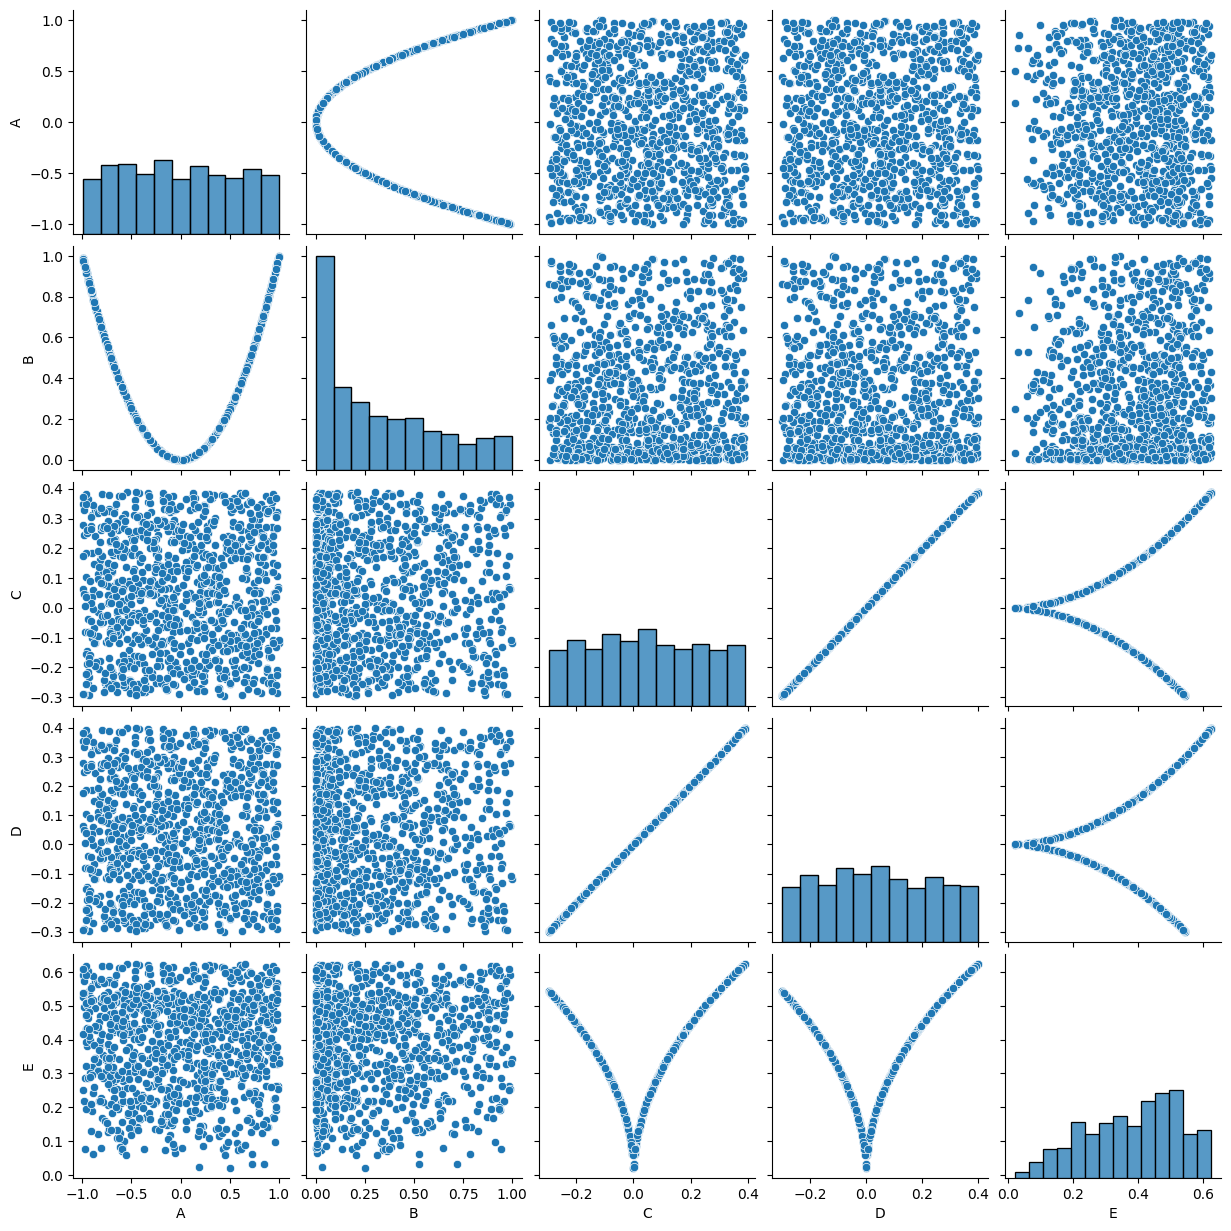

In [63]:
# В переменную many_factors загружена таблица из файла many_factors_data.csv
many_factors = pd.read_csv('many_factors_data.csv')
sns.pairplot(many_factors)

<Axes: xlabel='A', ylabel='Count'>

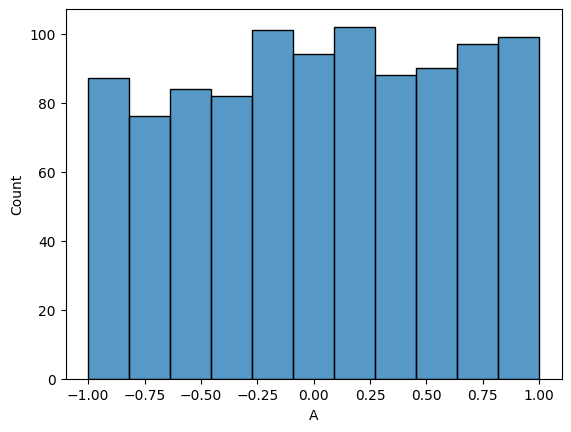

In [74]:
# В переменную uniform_and_not загружена таблица из файла uniform_and_not_data
uniform_and_not = pd.read_csv('uniform_and_not_data.csv')
sns.histplot(uniform_and_not["A"])

<Axes: xlabel='B', ylabel='Count'>

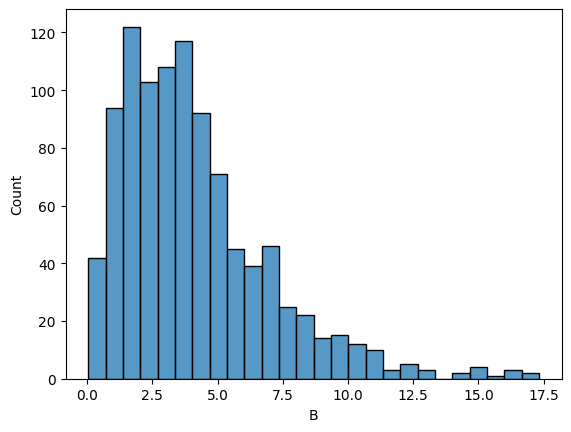

In [75]:
sns.histplot(uniform_and_not["B"])

<Axes: xlabel='C', ylabel='Count'>

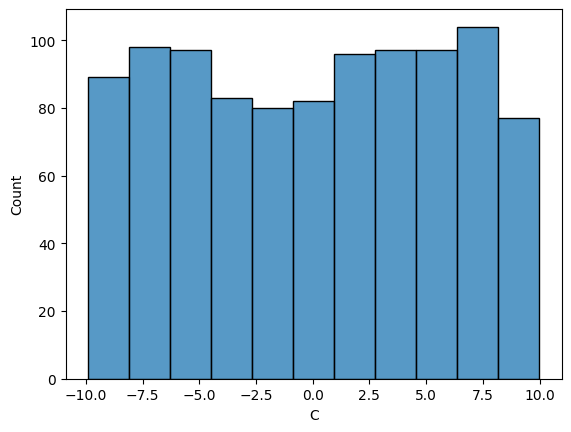

In [76]:
sns.histplot(uniform_and_not["C"])

<Axes: xlabel='D', ylabel='Count'>

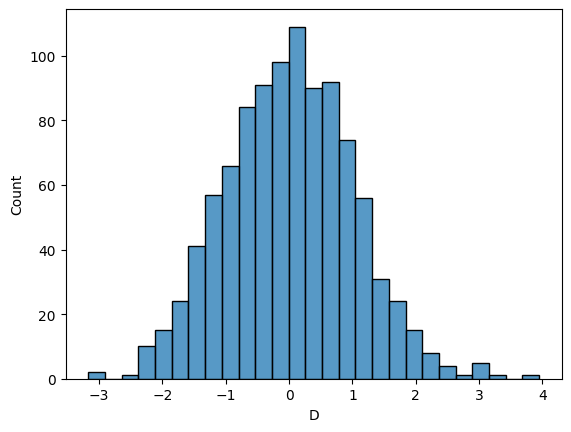

In [78]:
sns.histplot(uniform_and_not["D"])

<Axes: xlabel='E', ylabel='Count'>

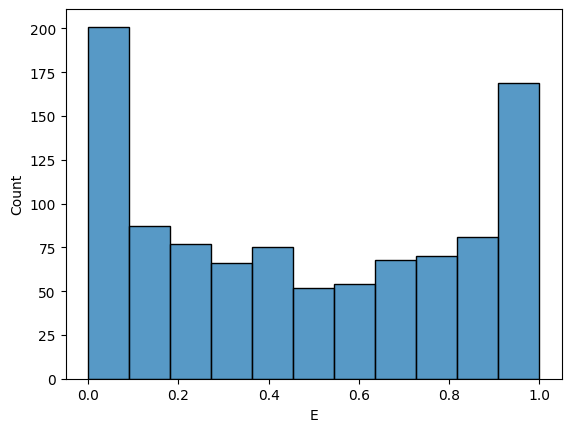

In [79]:
sns.histplot(uniform_and_not["E"])